In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Ex. 1


Plague model In a plague model with births, S(t) is the number of susceptible individuals, and I(t) is the number of the infected individuals.
It is assumed that susceptible individuals can produce an uninfected offspring with rate b, that they become infected, when they come in contact
with infected people, with rate β, and that the infected individuals die
with rate k. This is described by the following equations:

$$\begin{cases} \frac{\operatorname{d}S}{\operatorname{d}t} = b S - \beta I S\\ \frac{\operatorname{d}I}{\operatorname{d}t} = \beta I S-kI\end{cases}$$

Solve the system numerically with b = 3, β = 3 and k = 3. Try initial conditions S(0) = 1, and I(0) equal to either 0.1, 0.5 or 1.3. Look at the solutions in the phase plane. Where do you think the steady states are, what types are they?

In [0]:
def si_model(y, t, beta, b, k):
    S, I = y
    dydt = [b*S-beta*I*S, beta*I*S-k*I]  # equations
    return dydt

In [0]:
def solve(model, y0, t, args):
    sol = odeint(model, y0, t, args=args)
    return sol

In [0]:
def generate_plot(t, solution, labels):
    plt.figure(figsize = (10, 6))  
    for i in range(solution.shape[1]):
        plt.plot(t, solution[:, i], label=labels[i])
    
    plt.legend(loc='best')
    plt.xlabel('t')

Initial conditions:

In [0]:
b=3
beta=3
k=3
t = np.linspace(1, 10, 1001)

args = (beta, b, k)
s0 = 1

### For I(t) = 0.1

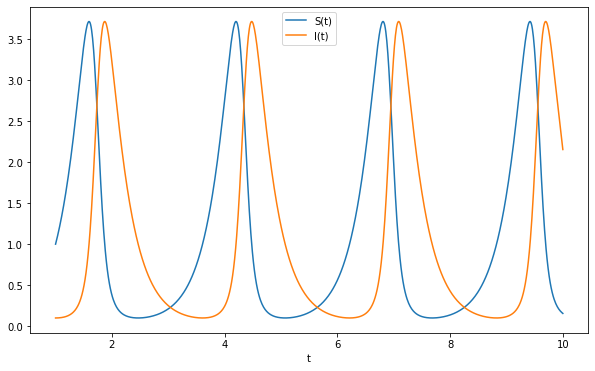

In [6]:
i0 = 0.1
solution = solve(si_model, [s0, i0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)'])

### I(t) = 0.5


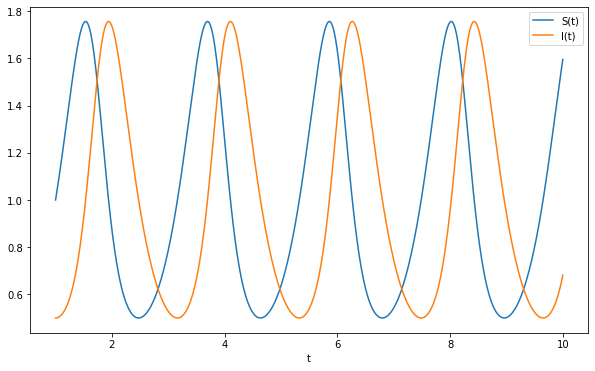

In [7]:
i0 = 0.5
solution = solve(si_model, [s0, i0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)'])

### I(t) = 1.3


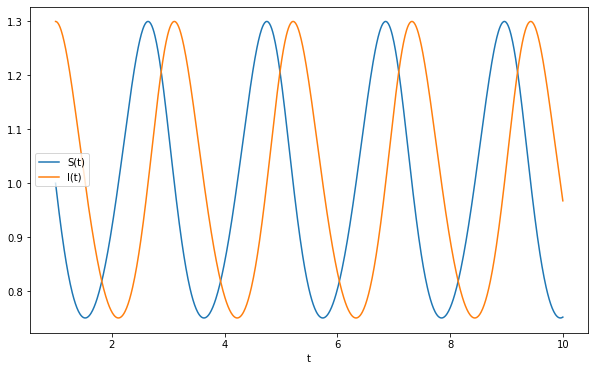

In [8]:
i0 = 1.3
solution = solve(si_model, [s0, i0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)'])

## Phrase plane

In [0]:
def plot_phase_plane(ax, f, u_range, v_range, args=(), n_grid=50):
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    speed = np.sqrt(u_vel**2 + v_vel**2)
    lw = 0.5 + 2.5 * speed / speed.max()

    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, density=1, color='blue')

    return ax

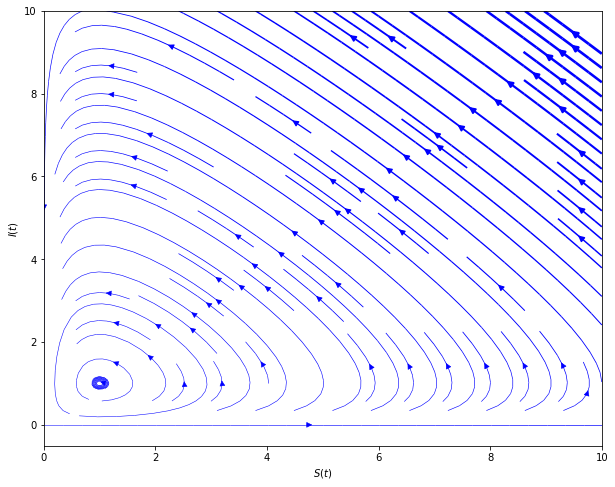

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.set_xlabel('$S(t)$')
ax.set_ylabel('$I(t)$')
plot_phase_plane(ax, si_model, (0, 10), (0, 10), args = args)